In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
import controller

[[5, 6, 7, 8, 9], [10, 11, 12, 13, 14], [15, 16, 17, 18, 19]]


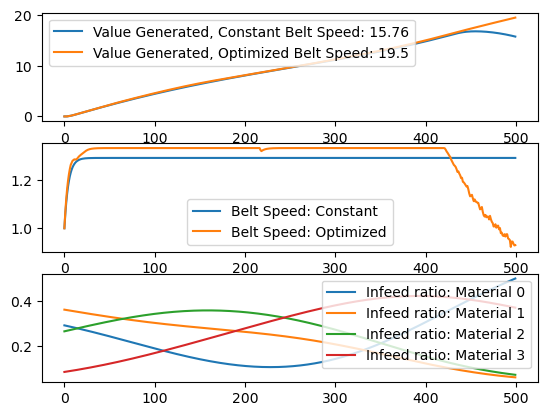

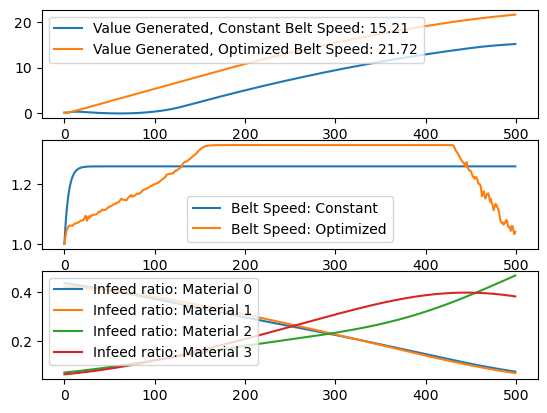

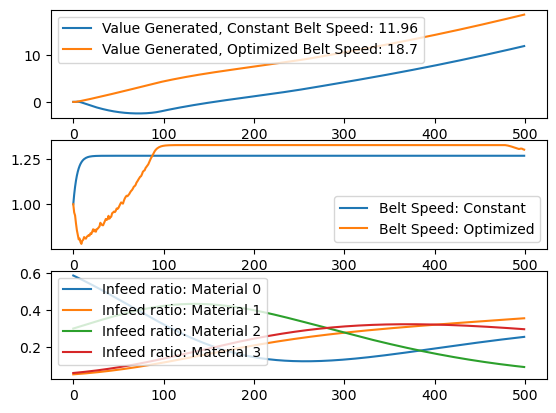

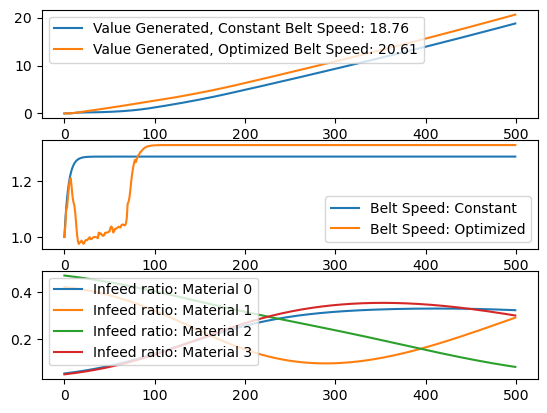

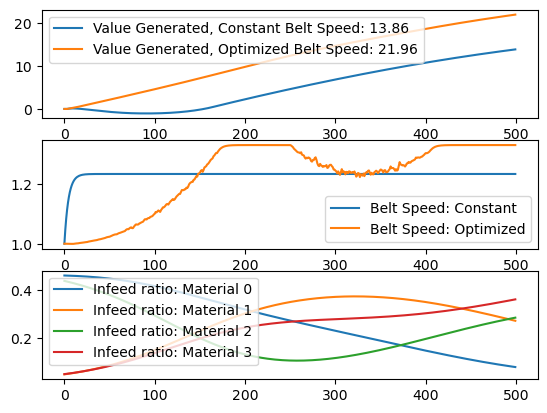

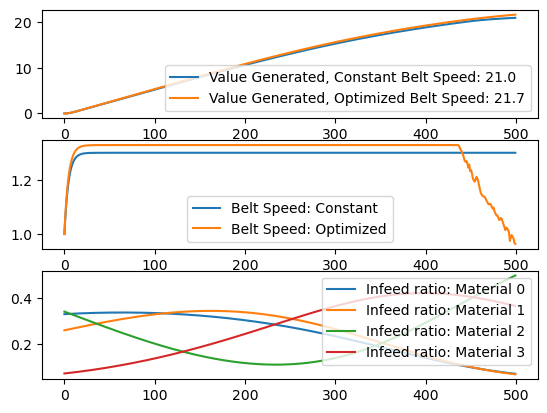

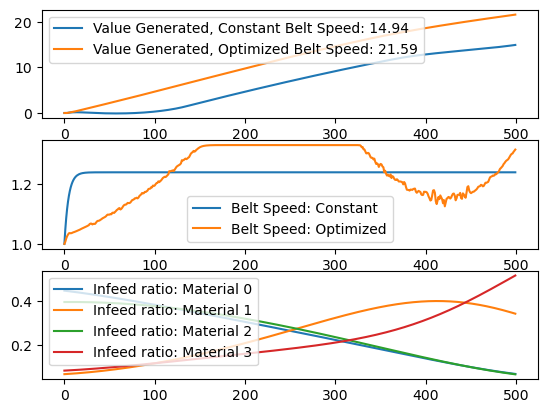

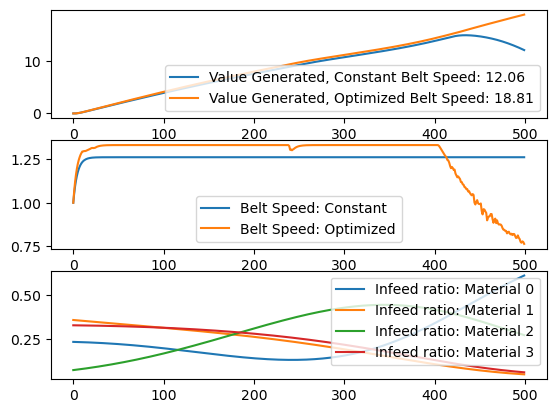

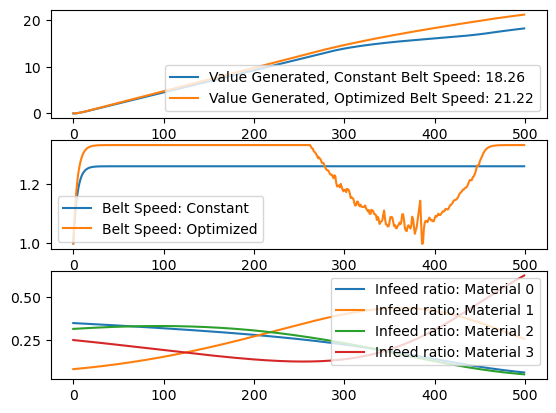

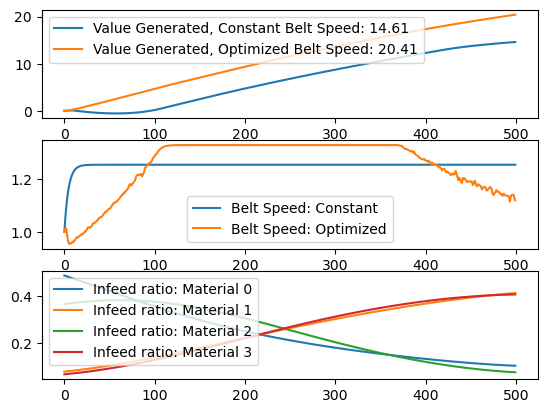

In [9]:
exp_dir = 'experiments/4_mats/'
# exp_dir = '../25x_hour_new_infeed/'
const_score_list, opt_score_list = [], []
prices = np.array([0.306, 0.01875])
C = controller.controller()
for i in range(10):
    infeed_df = pd.read_csv(exp_dir + 'infeed' + str(i)+ '.csv', names=['0', '1', '2', '3'])
    infeed = infeed_df.to_numpy()
    const_df = pd.read_csv(exp_dir + 'const_run_' + str(i)+ '.csv', index_col = 0)
    opt_df = pd.read_csv(exp_dir + 'opt_run_' + str(i)+ '.csv', index_col = 0)
    
#     max_score = 0
#     min_score = 0
#     for step in range(infeed.shape[-1]):
#         for mat in range(2):
#             max_score += infeed[step, mat] * prices[mat]
#             min_score += infeed[step, mat] * prices[-1]
#             if mat+1 < 2:
#                 min_score -= infeed[step, mat] * prices[mat] 
                
        
#     print(min_score, ', ', max_score)
    
#     const_score_list.append(np.max((const_df['total_score_hist']-min_score)/(max_score - min_score)))
#     opt_score_list.append(np.max((opt_df['total_score_hist']-min_score)/(max_score - min_score)))
    
    const_score_list.append(np.max(const_df['total_score_hist']))
    opt_score_list.append(np.max(opt_df['total_score_hist']))
    fig, ax = plt.subplots(3)
    
    ax[0].plot(const_df['total_score_hist'], label='Value Generated, Constant Belt Speed: ' + str(np.round(const_df['total_score_hist'].values[-1], decimals= 2)))
    ax[0].plot(opt_df['total_score_hist'], label='Value Generated, Optimized Belt Speed: ' + str(np.round(opt_df['total_score_hist'].values[-1], decimals= 2)))
    ax[0].legend()
    
    
    ax[1].plot(const_df['speed_hist'], label='Belt Speed: Constant')
    ax[1].plot(opt_df['speed_hist'], label='Belt Speed: Optimized')
    ax[1].legend()
    
    ax[2].plot(infeed_df['0'], label='Infeed ratio: Material 0')
    ax[2].plot(infeed_df['1'], label='Infeed ratio: Material 1')
    ax[2].plot(infeed_df['2'], label='Infeed ratio: Material 2')
    ax[2].plot(infeed_df['3'], label='Infeed ratio: Material 3')
    
    ax[2].legend()
    plt.show()
    

const_score = np.array(const_score_list)
opt_score = np.array(opt_score_list)

In [97]:
C.picks


[[5, 6, 7, 8, 9], [10, 11, 12, 13, 14], [10, 11, 12, 13, 14]]

In [81]:
%matplotlib qt

In [10]:
print(np.mean(const_score_list))
print(np.std(const_score_list))

print(np.mean(opt_score_list))
print(np.std(opt_score_list))




16.0272093659689
2.532270393012427
20.622193590705663
1.173341589042901


In [11]:
1+ (np.mean(opt_score_list) - np.mean(const_score_list))/np.mean(const_score_list) 

1.2866989579916166

In [10]:
exes = np.concatenate((np.ones_like(const_score), np.zeros_like(opt_score)))
whys = np.concatenate((const_score/100, opt_score/100))

df = pd.DataFrame({'Constant Speed':(const_score/100), 'Optimized Speed':(opt_score/100)})
plt.figure()
plt.ylabel('USD/Hour')
plt.title('Value generated by sorting: \n100 procedurally generated infeeds')
sns.violinplot(data = df, cut=0, orient='v')
# sns.violinplot(x = ['Constant Speed', 'Optimized Speed'], y = whys)

<Axes: title={'center': 'Value generated by sorting: \n100 procedurally generated infeeds'}, ylabel='USD/Hour'>

In [9]:
%matplotlib qt

In [32]:
np.linalg.pinv(at)

array([[2., 2.],
       [1., 1.]])

In [33]:
C = np.array([[2, -1, 0], 
              [-1, 2, -1], 
              [0, -1, 2]])

In [34]:
np.linalg.eig(C)

(array([3.41421356, 2.        , 0.58578644]),
 array([[-5.00000000e-01, -7.07106781e-01,  5.00000000e-01],
        [ 7.07106781e-01,  4.05405432e-16,  7.07106781e-01],
        [-5.00000000e-01,  7.07106781e-01,  5.00000000e-01]]))

In [52]:
plt.scatter(np.zeros_like(opt_score), opt_score)
plt.scatter(np.ones_like(const_score), const_score)


In [51]:
%matplotlib qt

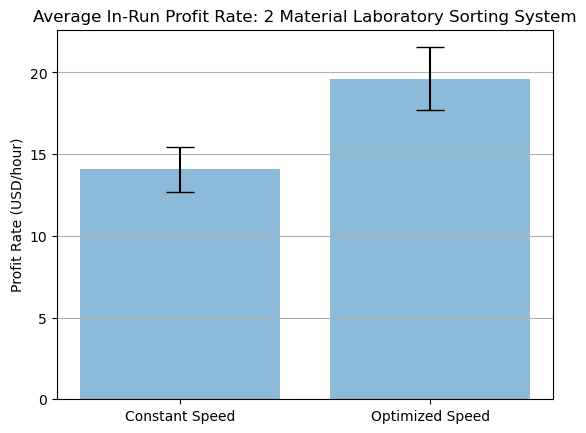

In [38]:
## data from physical experiment here

means = [19.61056501, 14.06749313]
stdevs = [1.927156765, 1.358788555]
exes = [0, 1]
col_labs = ['Optimized Speed', 'Constant Speed']

means.reverse()
stdevs.reverse()
# exes = [0, 1]
col_labs.reverse()

fig, ax = plt.subplots()
ax.bar(exes, means, yerr=stdevs, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Profit Rate (USD/hour)')
ax.set_xticks(exes)
ax.set_xticklabels(col_labs)
ax.set_title('Average In-Run Profit Rate: 2 Material Laboratory Sorting System')
ax.yaxis.grid(True)


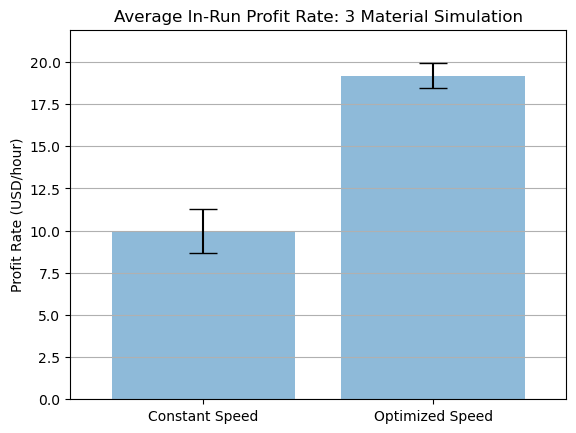

In [80]:
means = [19.1813802911702, 9.962541256808795]
stdevs = [0.7346296198827243, 1.291448094404258]
exes = [0, 1]
col_labs = ['Optimized Speed', 'Constant Speed']

means.reverse()
stdevs.reverse()
# exes = [0, 1]
col_labs.reverse()

fig, ax = plt.subplots()
ax.bar(exes, means, yerr=stdevs, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Profit Rate (USD/hour)')
ax.set_xticks(exes)
ax.set_xticklabels(col_labs)
ax.set_title('Average In-Run Profit Rate: 3 Material Simulation')
ax.yaxis.grid(True)
ax.margins(0.1)

In [42]:
%matplotlib qt

In [36]:
means.reverse()